**How does the season impact wait times?**

In [0]:
# We import everything we think we might need

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
from google.colab import files
import warnings
warnings.filterwarnings("ignore")

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

In [0]:
# This is where my data is located on my drive
path = '/content/drive/My Drive/Data Science/Disney Data 2018/'
# path = '/content/drive/My Drive/Disney Data 2018/'

In [0]:
file = pd.read_csv(open(path + 'metadata_day_info.csv'))

In [0]:
#trimming metadata
data = file[['DATE', 'DAYOFWEEK', 'MONTHOFYEAR', 'YEAR', 'SEASON', 'WDWSEASON']]

In [0]:
data['WDWSEASON'] = data['WDWSEASON'].str.replace('MARTIN LUTHER KING JUNIOR DAY','M.L.K. DAY')
data.head()

,DATE,DAYOFWEEK,MONTHOFYEAR,YEAR,SEASON,WDWSEASON
0,01/01/2012,1,1,2012,CHRISTMAS PEAK,CHRISTMAS PEAK
1,01/02/2012,2,1,2012,CHRISTMAS,CHRISTMAS
2,01/03/2012,3,1,2012,CHRISTMAS,CHRISTMAS
3,01/04/2012,4,1,2012,CHRISTMAS,CHRISTMAS
4,01/05/2012,5,1,2012,CHRISTMAS,CHRISTMAS


In [0]:
#renaming metadata columns
data.columns = ['date', 'Day of Week', 'Month', 'Year', 'Season', 'Disney Season']

data = data.set_index('date')

In [0]:
data.iloc[7:20]

,Day of Week,Month,Year,Season,Disney Season
date,,,,,
01/08/2012,1,1,2012,CHRISTMAS,CHRISTMAS
01/09/2012,2,1,2012,CHRISTMAS,CHRISTMAS
01/10/2012,3,1,2012,WINTER,WINTER
01/11/2012,4,1,2012,WINTER,WINTER
01/12/2012,5,1,2012,MARTIN LUTHER KING JUNIOR DAY,M.L.K. DAY
01/13/2012,6,1,2012,MARTIN LUTHER KING JUNIOR DAY,M.L.K. DAY
01/14/2012,7,1,2012,MARTIN LUTHER KING JUNIOR DAY,M.L.K. DAY
01/15/2012,1,1,2012,MARTIN LUTHER KING JUNIOR DAY,M.L.K. DAY
01/16/2012,2,1,2012,MARTIN LUTHER KING JUNIOR DAY,M.L.K. DAY


In [0]:
data.shape

(2493, 5)

# Importing Ride **Data**

In [0]:
# Magic Kingdom 
ride1 = pd.read_csv(open(path + 'ride_toystory.csv'))
ride1 = ride1[ ride1['SPOSTMIN'] >= 0]
ride1 = ride1.drop(columns=['datetime', 'SACTMIN'])
ride1 = ride1.groupby(['date']).mean()
ride1.columns = ['Toy Posted Wait']

# Epcot
ride2 = pd.read_csv(open(path + 'ride_soarin.csv'))
ride2 = ride2[ ride2['SPOSTMIN'] >= 0]
ride2 = ride2.drop(columns=['datetime', 'SACTMIN'])
ride2 = ride2.groupby(['date']).mean()
ride2.columns = ['Soarin Posted Wait']

# Hollywood Studios
ride3 = pd.read_csv(open(path + 'ride_rockincoaster.csv'))
ride3 = ride3[ ride3['SPOSTMIN'] >= 0]
ride3 = ride3.drop(columns=['datetime', 'SACTMIN'])
ride3 = ride3.groupby(['date']).mean()
ride3.columns = ['Rockin Posted Wait']

# Animal Kingdom
ride4 = pd.read_csv(open(path + 'ride_expeditioneverest.csv'))
ride4 = ride4[ ride4['SPOSTMIN'] >= 0]
ride4 = ride4.drop(columns=['datetime', 'SACTMIN'])
ride4 = ride4.groupby(['date']).mean()
ride4.columns = ['Everest Posted Wait']


In [0]:
ride1.head()

,Toy Posted Wait
date,
01/01/2012,80.833333
01/01/2013,95.438596
01/01/2014,92.260870
01/01/2015,85.039370
01/01/2016,102.916667


In [0]:
combined = pd.concat([data, ride1, ride2, ride3, ride4], axis = 1)
combined = combined.drop(columns=['Day of Week', 'Month', 'Year', 'Season'])

combined.head()


,Disney Season,Toy Posted Wait,Soarin Posted Wait,Rockin Posted Wait,Everest Posted Wait
01/01/2012,CHRISTMAS PEAK,80.833333,69.000000,56.666667,30.172414
01/01/2013,CHRISTMAS PEAK,95.438596,97.333333,81.507937,44.855072
01/01/2014,CHRISTMAS PEAK,92.260870,102.079208,69.861111,34.388889
01/01/2015,CHRISTMAS PEAK,85.039370,89.814815,74.717742,40.268817
01/01/2016,CHRISTMAS PEAK,102.916667,69.746377,77.500000,40.000000


In [0]:
grouped = combined.groupby(['Disney Season'],as_index=False).mean()


grouped

,Disney Season,Toy Posted Wait,Soarin Posted Wait,Rockin Posted Wait,Everest Posted Wait
0,CHRISTMAS,79.686275,67.865574,70.031685,37.721597
1,CHRISTMAS PEAK,101.752765,101.878910,99.750721,52.206875
2,COLUMBUS DAY,75.127601,60.904355,65.642071,34.418854
3,EASTER,82.001364,74.257593,69.366005,39.551484
4,FALL,58.191181,46.251502,45.255645,21.867321
5,HALLOWEEN,50.984957,41.146964,40.677615,21.606707
6,JERSEY WEEK,66.702834,55.748850,48.211198,26.692941
7,JULY 4TH,63.551803,58.836116,62.689654,31.924894
8,M.L.K. DAY,67.402041,54.360639,53.334111,29.014714
9,MARDI GRAS,85.091394,63.639552,72.408834,36.899025


No handles with labels found to put in legend.


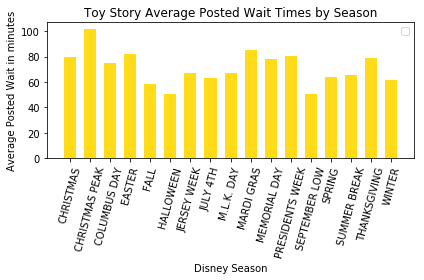

<Figure size 432x288 with 0 Axes>

In [0]:
# Plot Toy Story wait times 

fig, ax = plt.subplots()

bar_width = 0.6

opacity = 0.9
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(grouped['Disney Season'], grouped['Toy Posted Wait'], bar_width,
                alpha=opacity, color='gold')

plt.xticks(rotation=75)

ax.set_xlabel('Disney Season')
ax.set_ylabel('Average Posted Wait in minutes')
ax.set_title('Toy Story Average Posted Wait Times by Season')
ax.legend()

fig.tight_layout()
plt.show()
plt.savefig('Toy Story Wait Times')

No handles with labels found to put in legend.


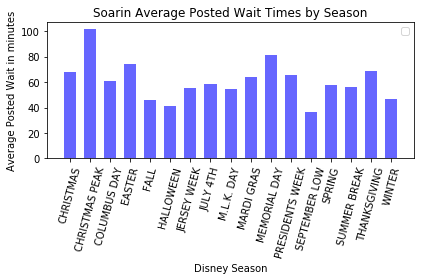

<Figure size 432x288 with 0 Axes>

In [0]:
# Plot Soarin wait times

fig, ax = plt.subplots()

bar_width = 0.6

opacity = 0.6
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(grouped['Disney Season'], grouped['Soarin Posted Wait'], bar_width,
                alpha=opacity, color='b')

plt.xticks(rotation=75)

ax.set_xlabel('Disney Season')
ax.set_ylabel('Average Posted Wait in minutes')
ax.set_title('Soarin Average Posted Wait Times by Season')
ax.legend()

fig.tight_layout()
plt.show()
plt.savefig('Soarin Wait Times.png')

No handles with labels found to put in legend.


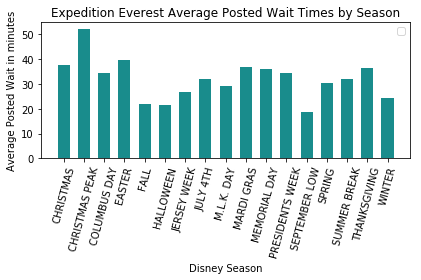

<Figure size 432x288 with 0 Axes>

In [0]:
# Plot Expedition Everest posted wait 

fig, ax = plt.subplots()

bar_width = 0.6

opacity = 0.9
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(grouped['Disney Season'], grouped['Everest Posted Wait'], bar_width,
                alpha=opacity, color='teal')

plt.xticks(rotation=75)

ax.set_xlabel('Disney Season')
ax.set_ylabel('Average Posted Wait in minutes')
ax.set_title('Expedition Everest Average Posted Wait Times by Season')
ax.legend()

fig.tight_layout()
plt.show()
plt.savefig('Everest Wait Times.png')

No handles with labels found to put in legend.


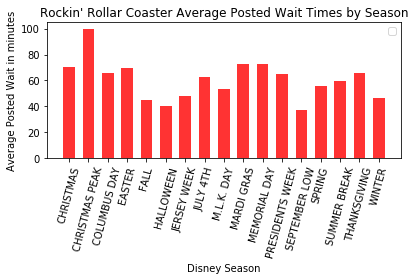

<Figure size 432x288 with 0 Axes>

In [0]:
# Plot Rockin' Rollar Coaster wait times

fig, ax = plt.subplots()

bar_width = 0.6

opacity = 0.8
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(grouped['Disney Season'], grouped['Rockin Posted Wait'], bar_width,
                alpha=opacity, color='r')

plt.xticks(rotation=75)

ax.set_xlabel('Disney Season')
ax.set_ylabel('Average Posted Wait in minutes')
ax.set_title('Rockin\' Rollar Coaster Average Posted Wait Times by Season')
ax.legend()

fig.tight_layout()
plt.show()
plt.savefig('Rockin Wait Times')

No handles with labels found to put in legend.


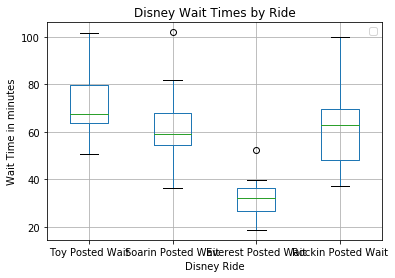

In [0]:
# in order for ax. to show up
fig, ax = plt.subplots()

# the plot
grouped.boxplot(['Toy Posted Wait', 'Soarin Posted Wait', 'Everest Posted Wait', 'Rockin Posted Wait'])

# labels
ax.set_xlabel('Disney Ride')
ax.set_ylabel('Wait Time in minutes')
ax.set_title('Disney Wait Times by Ride')
ax.legend()



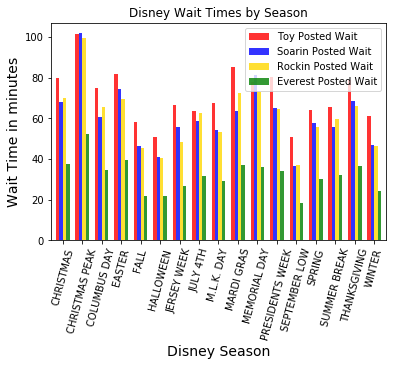

In [0]:
from itertools import cycle, islice
my_colors = list(islice(cycle(['r', 'b', 'gold', 'green']), None, len(grouped)))

opacity = 0.8
ax = grouped.set_index('Disney Season').plot(kind='bar', width = 0.7, color = my_colors, alpha = opacity)

plt.xticks(rotation=75)

bar_width = 7

ax.set_title('Disney Wait Times by Season')
ax.set_xlabel("Disney Season", fontsize=14)
ax.set_ylabel('Wait Time in minutes', fontsize=14)
plt.show()


# **Everything below this is not needed**

In [0]:
# create working data 
seasons = data2[['Date', 'Disney Season', 'Soar Posted Wait', 'Toy Posted Wait', 'Rockin Posted Wait', 'Everest Posted Wait']]
seasons.head()

In [0]:
plt.b

#sorting 'seasons' by Disney Season
seasons2 = seasons.sort_values(by = ['Disney Season'], ascending = True)
seasons2.iloc[600:604]


In [0]:
# Setting -999.0 equal to NaN, dropping all rows including NaN

seasons2 = seasons2.replace(-999.0, np.nan).dropna()
seasons2.iloc[0:5]




In [0]:
soar_work = seasons2[['Disney Season', 'Soar Posted Wait']]
soar_work.head()

In [0]:
# Slicing Soarin by season
soar_christmas = seasons2[0:84]
soar_christmas_peak = seasons2[84:102]
soar_winter = seasons2[1589:1811]
soar_spring = seasons2[813:1300]
soar_summer_break = seasons2[1300:1532]
soar_fall = seasons2[223:442]
soar_easter = seasons2[123:223]
soar_july_4th = seasons2[496:523]
soar_september_low = seasons2[663:813]

In [0]:
# Slicing Toy Story by season
toy_christmas = seasons2[0:84]
toy_christmas_peak = seasons2[84:102]
toy_winter = seasons2[1589:1811]
toy_spring = seasons2[813:1300]
toy_summer_break = seasons2[1300:1532]
toy_fall = seasons2[223:442]
toy_easter = seasons2[123:223]
toy_july_4th = seasons2[496:523]
toy_september_low = seasons2[663:813]

In [0]:
# Slicing Rockin by season
rockin_christmas = seasons2[0:84]
rockin_christmas_peak = seasons2[84:102]
rockin_winter = seasons2[1589:1811]
rockin_spring = seasons2[813:1300]
rockin_summer_break = seasons2[1300:1532]
rockin_fall = seasons2[223:442]
rockin_easter = seasons2[123:223]
rockin_july_4th = seasons2[496:523]
rockin_september_low = seasons2[663:813]

In [0]:
# Slicing Everest by season
everest_christmas = seasons2[0:84]
everest_christmas_peak = seasons2[84:102]
everest_winter = seasons2[1589:1811]
everest_spring = seasons2[813:1300]
everest_summer_break = seasons2[1300:1532]
everest_fall = seasons2[223:442]
everest_easter = seasons2[123:223]
everest_july_4th = seasons2[496:523]
everest_september_low = seasons2[663:813]

In [0]:
# Export Dataframe into Excel

seasons2.to_csv('seasons.csv', sep=',')



In [0]:
#Slicing 'Seasons2'into their own dataframes
christmas = seasons2[0:84]
christmas_peak = seasons2[84:102]
winter = seasons2[1589:1811]
spring = seasons2[813:1300]
summer_break = seasons2[1300:1532]
fall = seasons2[223:442]
easter = seasons2[123:223]
july_4th = seasons2[496:523]
september_low = seasons2[663:813]



# **AVERAGE WAIT TIMES**

In [0]:
# average wait times of Soarin by Season

print('Soarin - Christmas Average Wait Time: \t', soar_christmas['Soar Posted Wait'].mean())
print('Soarin - Christmas-Peak Average Wait Time: \t', soar_christmas_peak['Soar Posted Wait'].mean())
print('Soarin - Winter Average Wait Time: \t', soar_winter['Soar Posted Wait'].mean())
print('Soarin - Spring Average Wait Time: \t', soar_spring['Soar Posted Wait'].mean())
print('Soarin - Summer-Break Average Wait Time: \t', soar_summer_break['Soar Posted Wait'].mean())
print('Soarin - Fall Average Wait Time: \t', soar_fall['Soar Posted Wait'].mean())
print('Soarin - Easter Average Wait Time: \t', soar_easter['Soar Posted Wait'].mean())
print('Soarin - July 4th Average Wait Time: \t', soar_july_4th['Soar Posted Wait'].mean())
print('Soarin - September-Low Average Wait Time: \t', soar_september_low['Soar Posted Wait'].mean())

In [0]:
# average wait time of Toy Story by season

print('Toy Story - Christmas Average Wait Time: \t', toy_christmas['Toy Posted Wait'].mean())
print('Toy Story - Christmas-Peak Average Wait Time: \t', toy_christmas_peak['Toy Posted Wait'].mean())
print('Toy Story - Winter Average Wait Time: \t', toy_winter['Toy Posted Wait'].mean())
print('Toy Story - Spring Average Wait Time: \t', toy_spring['Toy Posted Wait'].mean())
print('Toy Story - Summer-Break Average Wait Time: \t', toy_summer_break['Toy Posted Wait'].mean())
print('Toy Story - Fall Average Wait Time: \t', toy_fall['Toy Posted Wait'].mean())
print('Toy Story - Easter Average Wait Time: \t', toy_easter['Toy Posted Wait'].mean())
print('Toy Story - July 4th Average Wait Time: \t', toy_july_4th['Toy Posted Wait'].mean())
print('Toy Story - September-Low Average Wait Time: \t', toy_september_low['Toy Posted Wait'].mean())

In [0]:
# average wait time of Rockin Rollar Coaster by season

print('Rockin\' Rollar Coaster - Christmas Average Wait Time: \t', rockin_christmas['Rockin Posted Wait'].mean())
print('Rockin\' Rollar Coaster - Christmas-Peak Average Wait Time: \t', rockin_christmas_peak['Rockin Posted Wait'].mean())
print('Rockin\' Rollar Coaster - Winter Average Wait Time: \t', rockin_winter['Rockin Posted Wait'].mean())
print('Rockin\' Rollar Coaster - Spring Average Wait Time: \t', rockin_spring['Rockin Posted Wait'].mean())
print('Rockin\' Rollar Coaster - Summer-Break Average Wait Time: \t', rockin_summer_break['Rockin Posted Wait'].mean())
print('Rockin\' Rollar Coaster - Fall Average Wait Time: \t', rockin_fall['Rockin Posted Wait'].mean())
print('Rockin\' Rollar Coaster - Easter Average Wait Time: \t', rockin_easter['Rockin Posted Wait'].mean())
print('Rockin\' Rollar Coaster - July 4th Average Wait Time: \t', rockin_july_4th['Rockin Posted Wait'].mean())
print('Rockin\' Rollar Coaster - September-Low Average Wait Time: \t', rockin_september_low['Rockin Posted Wait'].mean())

In [0]:
# average wait times of Expedition Everest by season

print('Expedition Everest - Christmas Average Wait Time: \t', everest_christmas['Everest Posted Wait'].mean())
print('Expedition Everest - Christmas-Peak Average Wait Time: \t', everest_christmas_peak['Everest Posted Wait'].mean())
print('Expedition Everest - Winter Average Wait Time: \t', everest_winter['Everest Posted Wait'].mean())
print('Expedition Everest - Spring Average Wait Time: \t', everest_spring['Everest Posted Wait'].mean())
print('Expedition Everest - Summer-Break Average Wait Time: \t', everest_summer_break['Everest Posted Wait'].mean())
print('Expedition Everest - Fall Average Wait Time: \t', everest_fall['Everest Posted Wait'].mean())
print('Expedition Everest - Easter Average Wait Time: \t', everest_easter['Everest Posted Wait'].mean())
print('Expedition Everest - July 4th Average Wait Time: \t', everest_july_4th['Everest Posted Wait'].mean())
print('Expedition Everest - September-Low Average Wait Time: \t', everest_september_low['Everest Posted Wait'].mean())

In [0]:
everest_christmas['Everest Posted Wait']